# 线性回归

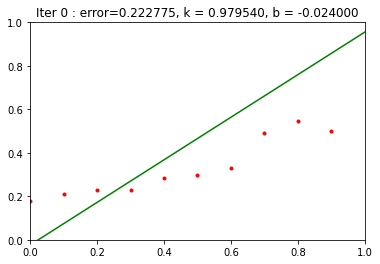

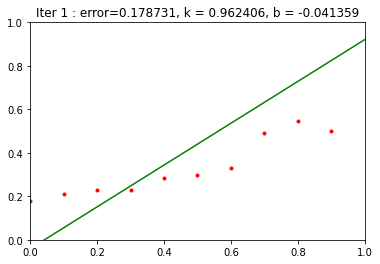

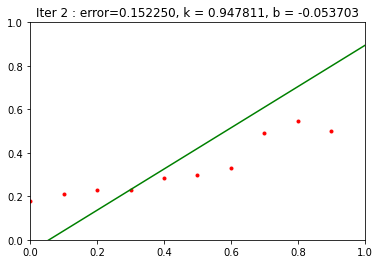

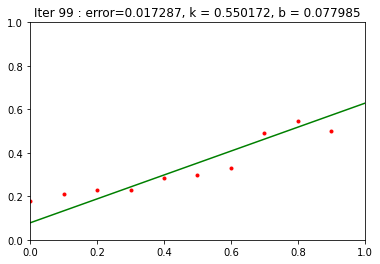

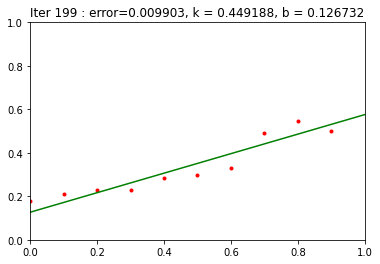

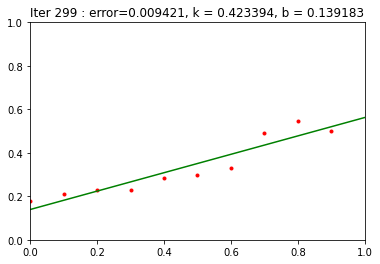

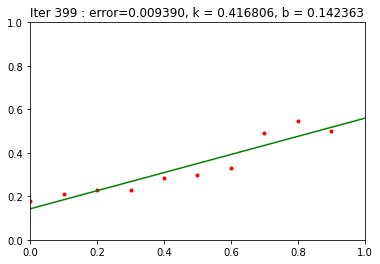

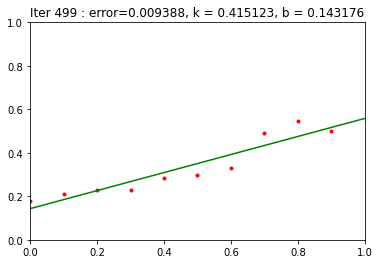

模型的参数是：k=0.415123, b=0.143176, 预估的2019房价为：5.582986 万元


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import random

#梯度下降法
def fit(x, target):

    lr = 0.02
    k = 1 #random.random()
    b = 0

    plt.figure()

    for i in range(500):

        out = k * x + b
        err = np.sum((out - target)** 2 * 0.5)

        delta_k = np.sum((target - out) * (-x))
        delta_b = np.sum((target - out) * (-1))

        k = k - lr * delta_k
        b = b - lr * delta_b

        tx = np.array([0, 1])
        ty = k * tx + b

        if (i + 1) % 100 == 0 or i < 3:
            #print("Iter %d : error=%f, k = %f, b = %f" % (i, err, k, b))
            plt.clf()
            plt.title("Iter %d : error=%f, k = %f, b = %f" % (i, err, k, b))
            plt.plot(x, target, "r.")
            plt.plot(tx, ty, 'g-')
            plt.axis([0, 1, 0, 1])
            plt.pause(0.01)

    return (k, b)

#我们定义房价数据
x = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], dtype=np.float32).T
y = np.array([[1.8, 2.1, 2.3, 2.3, 2.85, 3.0, 3.3, 4.9, 5.45, 5.0]], dtype=np.float32).T

#数据归一化
x = x / 10.0
y = y / 10.0

#梯度下降法求解
k, b = fit(x, y)

#估算2019年的房价多少
#归一化
x_2019 = (2019-2009) / 10.0
v_2019 = x_2019 * k + b

#结果反归一化
v_2019 = v_2019 * 10
print("模型的参数是：k=%f, b=%f, 预估的2019房价为：%f 万元" % (k, b, v_2019))

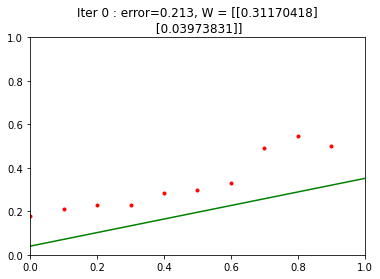

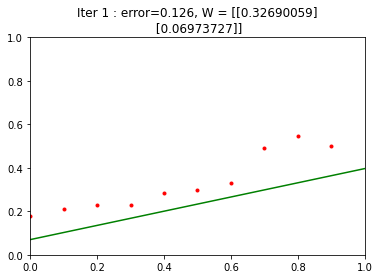

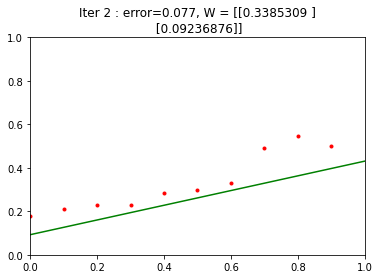

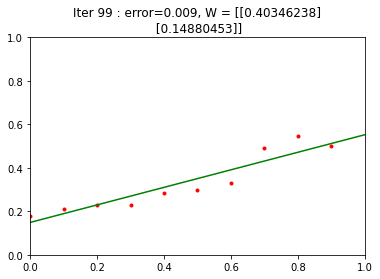

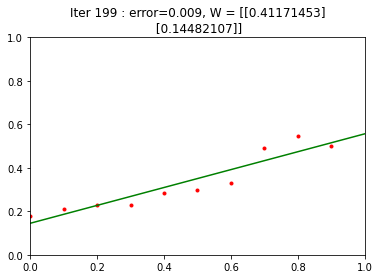

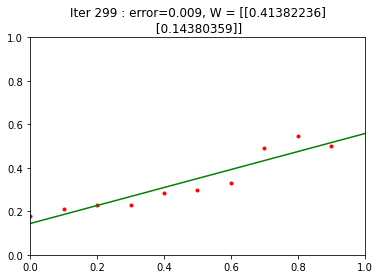

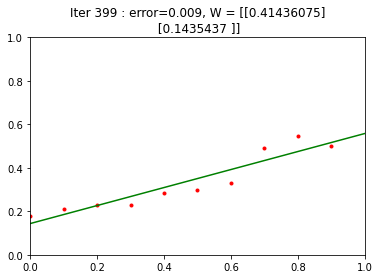

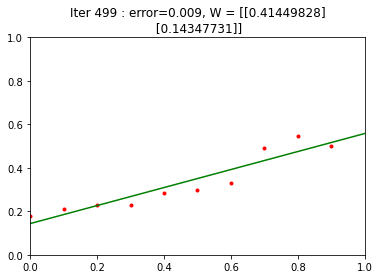

模型的参数是：W = [[0.41449828]
 [0.14347731]], 预估的2019房价为：[[5.57975586]] 万元


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import random

#梯度下降法
def fit(x, target):
    '''
    x.shape:       num_sample x num_feature
    target.shape:  num_sample x 1
    '''
    
    x_hat  = np.ones((x.shape[0], x.shape[1] + 1))
    x_hat[:, 0] = x[:, 0]
    nfeature = x_hat.shape[1]
    nclass   = target.shape[1]
    
    lr = 0.02
    W = np.random.normal(0, 1.0, size=(nfeature, nclass))
    
    # 偏置初始化为0
    W[-1] = 0
    
    plt.figure()
    for i in range(500):

        out = x_hat @ W
        err = np.sum((out - target)** 2 * 0.5)
        
        # deltaA = G @ B^T
        # deltaB = A^T @ G
        G = 0.5 * 2 * (out - target)
        delta_W = x_hat.T @ G
        W = W - lr * delta_W

        if (i + 1) % 100 == 0 or i < 3:
            
            # 对于x，取值为0到1，然后添加了一个维度特征1
            tx = np.array([
                [0, 1],
                [1, 1]
            ])
            ty = tx @ W
        
            plt.clf()
            plt.title(f"Iter {i} : error={err:.3f}, W = {W}")
            plt.plot(x, target, "r.")
            plt.plot(tx[:, 0], ty, 'g-')
            plt.axis([0, 1, 0, 1])
            plt.pause(0.01)

    return W

#我们定义房价数据
x = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], dtype=np.float32).T
y = np.array([[1.8, 2.1, 2.3, 2.3, 2.85, 3.0, 3.3, 4.9, 5.45, 5.0]], dtype=np.float32).T

#数据归一化
x = x / 10.0
y = y / 10.0

#梯度下降法求解
W = fit(x, y)

#估算2019年的房价多少
#归一化
x_2019 = (2019-2009) / 10.0

# 定义的房价数据中添加了1
v_2019 = np.array([
    [x_2019, 1]
]) @ W

#结果反归一化
v_2019 = v_2019 * 10
print(f"模型的参数是：W = {W}, 预估的2019房价为：{v_2019} 万元")